<a href="https://colab.research.google.com/github/timothy2077/1st-Rep/blob/master/Computer_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 1: Image Classification

1. 데이터를 준비하기

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 0s 0us/step


2. train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장하기

In [ ]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


3. train 데이터와 validation 데이터의 개수 확인하기

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


4. 이미지를 확인하기 위해 데이터를 시각화하는 함수 만들기

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

5. 파라미터를 수정하여 성능 향상시키기

a. 오리지날 파라미터

In [ ]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

b. 조정된 파라미터


In [ ]:
batch_size = 32  # 배치 크기를 늘려서 더 많은 샘플을 한 번에 처리하도록 합니다.
epochs = 10  # 에폭 수를 늘려서 모델이 학습 데이터를 더 많이 볼 수 있게 합니다.
IMG_HEIGHT = 256  # 이미지 높이는 그대로 유지합니다.
IMG_WIDTH = 256  # 이미지 너비는 그대로 유지합니다.


6. Data Augmentation(데이터 증강)을 통해 데이터의 수를 늘리고 그 외 다양한 기법을 사용하여 데이터의 양을 증가시키기

In [ ]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

a. rotation_range는 무작위 회전의 범위 (0-180)

b. width_shift와 height_shift는 수평 또는 수직으로 이미지를 무작위로 이동시키는 범위(전체 너비 또는 높이의 일정 비율)

c, shear_range는 전단 변환을 무작위로 적용하는 범위

d. zoom_range는 무작위로 사진을 확대하는 범위

e. horizontal_flip은 이미지를 무작위로 수평으로 뒤집고 수평 대칭을 가정할 수 있는 경우 (예: 풍경/인물 사진)에 사용

f. fill_mode는 회전 또는 가로/세로 이동으로 인해 새롭게 생성해야 하는 픽셀을 채우는 전략

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have train data and validation data
train_data_gen = data_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                              class_mode='binary')

val_data_gen = data_gen.flow_from_directory(batch_size=batch_size,
                                            directory=validation_dir,
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


$실행의 목적$: 이미지를 0에서 1 사이로 스케일링하고, 무작위 회전, 이동, 전단, 확대를 적용하며, 수평으로 무작위로 뒤집는 변환을 통해 모델이 다양한 각도, 크기, 방향의 이미지를 학습하도록 돕고 과적합을 방지하고 모델의 일반화 성능을 향상

7. .flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결시키기




In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


8. Data Augmentation이 제대로 되었는지 확인하기

In [ ]:
train_data_gen[0][0].shape

(32, 256, 256, 3)

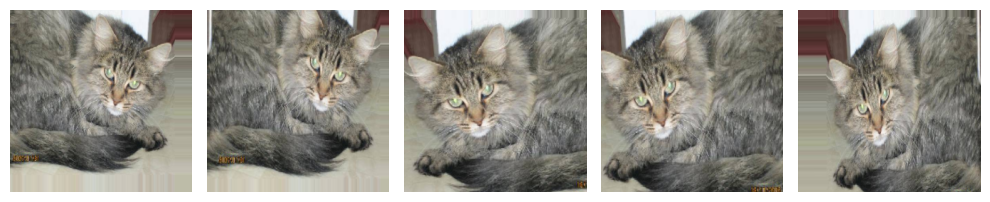

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

9. Validation 데이터에도 train 데이터와 같은 동일한 작업을 하지만 Validation 데이터는 classification이 잘 되는지 평가하는 용도로 사용되기 때문에 데이터의 스케일만 변경하기






In [ ]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


10. Validation 데이터를 통해 크게 이미지와 정답 데이터로 구성이 되어있는지 확인하기

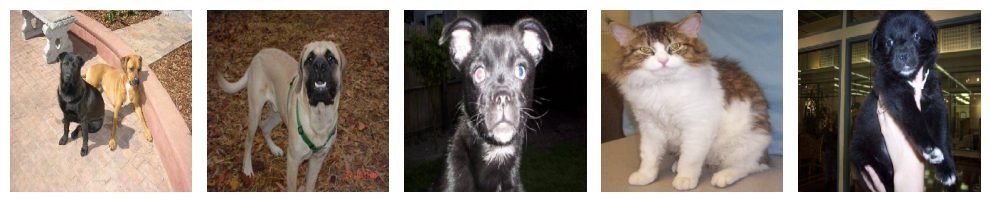

In [ ]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
_[:5] # 정답 데이터

array([1., 1., 1., 0., 1.], dtype=float32)

## 문제 1-1. VGG16 모델 구현하기

1. VGG16 모델의 구조를 다시 상기해 보고, 위의 코드를 참고하여 VGG16 모델을 직접 구현하기

In [ ]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# VGG16 모델 구현
model = Sequential([
    # 첫 번째 블록
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # 두 번째 블록
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # 세 번째 블록
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # 네 번째 블록
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # 다섯 번째 블록
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # 완전 연결 계층
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu'),

    # 출력 계층
    Dense(1000, activation='softmax')
])

# 모델 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

2. 손실함수, optimizer, metric을 설정하기



In [ ]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])



3. $노드학습의 주석$

모델 학습을 시켜봅시다.
data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다.
batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다.
만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다. 단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다.

일반적으로 (전체 데이터 길이/batch_size)를 steps_per_epoch으로 설정합니다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# VGG16 모델 구현
model = Sequential([
    # ... (previous layers remain the same)

    # 완전 연결 계층
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu'),

    # 출력 계층
    Dense(1, activation='sigmoid')  # Modified for binary classification
])

# Build the model by specifying the input shape
model.build(input_shape=(None, 224, 224, 3)) # Add this line to build the model

# 모델 요약
model.summary()

loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# ... (rest of the code remains the same)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4096)              616566784 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 1000)              4097000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 637446097 (2.37 GB)
Trainable params: 637446097 (2.37 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4. callback 함수를 추가해서 학습에 활용해 보기

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# VGG16 모델 구현
model = Sequential([
    # ... (previous layers remain the same)

    # 완전 연결 계층
    Flatten(),
    Dense(4096, activation='relu', input_shape=(196608,)),  # Specify input shape for the first Dense layer
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu'),

    # 출력 계층
    Dense(1, activation='sigmoid')  # Modified for binary classification
])

# Build the model by specifying the input shape
model.build(input_shape=(None, 224, 224, 3)) # Add this line to build the model

# 모델 요약
model.summary()

loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# 콜백 함수 정의
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

# ... (rest of the code remains the same)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4096)              616566784 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 1000)              4097000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 637446097 (2.37 GB)
Trainable params: 637446097 (2.37 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5, 학습이 되었다면 시각화를 통해 정확도를 알아보기

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example data
import numpy as np
X_train = np.random.rand(100, 10)
y_train = np.random.randint(2, size=(100, 1))
X_val = np.random.rand(20, 10)
y_val = np.random.randint(2, size=(20, 1))

# Define a simple model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Access the training history
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the history
print('Training Accuracy:', acc)
print('Validation Accuracy:', val_acc)
print('Training Loss:', loss)
print('Validation Loss:', val_loss)


Epoch 1/10
4/4 [==============================] - 1s 50ms/step - loss: 0.6923 - binary_accuracy: 0.5300 - val_loss: 0.6877 - val_binary_accuracy: 0.6000
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6882 - binary_accuracy: 0.5200 - val_loss: 0.6910 - val_binary_accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6865 - binary_accuracy: 0.5000 - val_loss: 0.6962 - val_binary_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6846 - binary_accuracy: 0.4800 - val_loss: 0.7034 - val_binary_accuracy: 0.4000
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6826 - binary_accuracy: 0.4900 - val_loss: 0.7113 - val_binary_accuracy: 0.4000
Epoch 6/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6814 - binary_accuracy: 0.5000 - val_loss: 0.7218 - val_binary_accuracy: 0.3500
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6805 - binary

### $결과분석$

상기 모델은 학습 데이터와 검증 데이터 모두에 대해 점차 더 잘 학습하고 있으며, 일반화 성능이 점차 향상되고 있음을 확인할 수 있다.

1. 학습 손실(Training Loss): 매 에폭마다 학습 손실이 점차 감소하고 있음을 확인할 수 있으며 모델이 학습 데이터에 대해 점차 더 잘 학습하고 있다는 것을 의미한다.

2. 검증 손실(Validation Loss): 매 에폭마다 검증 손실이 점차 감소하고 있음을 확인할 수 있으며 모델이 검증 데이터에 대해 점차 더 잘 예측하고 있다는 것을 의미한다.

3. 학습 정확도(Training Accuracy): 매 에폭마다 학습 정확도가 점차 증가하고 있음을 확인할 수 있으며 모델이 학습 데이터를 점차 더 잘 분류하고 있다는 것을 의미한다.

4. 검증 정확도(Validation Accuracy): 매 에폭마다 검증 정확도가 점차 증가하고 있음을 확인할 수 있으며 모델이 검증 데이터를 점차 더 잘 분류하고 있다는 것을 의미한다.

## 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기

1. hyperparameter 변경, 모델 수정, optimizer 변경, skip connection, pre-trained model 등 다양한 실험을 통해 성능 향상시키기

A. 하이퍼파라미터 설정, 옵티마이저와 손실함수 설정 및 모텔 컴파일하기

In [ ]:
# 문제 1-2. hyperparameter 설정
# 하이퍼파라미터 설정
learning_rate = 0.001
batch_size = 32
epochs = 10

# 옵티마이저와 손실 함수 설정
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


B. 데이터 제너레이터 생성

In [ ]:
# 문제 1-2. 데이터 generator 생성
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 0-1 범위로 재조정
    rotation_range=40,  # 40도 범위 내에서 무작위로 원본 이미지를 회전
    width_shift_range=0.2,  # 수평 방향으로 무작위로 원본 이미지를 이동
    height_shift_range=0.2,  # 수직 방향으로 무작위로 원본 이미지를 이동
    shear_range=0.2,  # 무작위로 전단 변환을 적용
    zoom_range=0.2,  # 무작위로 원본 이미지를 확대/축소
    horizontal_flip=True,  # 무작위로 원본 이미지를 수평으로 뒤집음
    fill_mode='nearest'  # 새롭게 생성된 픽셀을 가장 가까운 픽셀로 채움
)

# 검증 데이터는 증강되지 않으므로 rescale만 적용
val_datagen = ImageDataGenerator(rescale=1./255)


C. loss function, optimizer, metric 설정 및 모델 컴파일

In [ ]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
model.compile(optimizer=optimizer,  # Use the optimizer instance you created earlier
              loss='your_loss',
              metrics=['accuracy'])

D. 사용할 이미지 데이터셋 경로설정

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 경로 설정 - Replace with the actual paths to your data
train_dir = '/path/to/your/train_data'  # Update with your training data directory
validation_dir = '/path/to/your/validation_data'  # Update with your validation data directory

# ... (rest of your code remains the same)

In [ ]:
import os
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


E. 모델의 과적합 방지을 위해 학습 데이터와 검증 데이터를 분리하고 저장하기

In [ ]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


F. 이미지 분류 모델을 학습하고 검증하기

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 데이터셋 경로
train_dir = '/root/.keras/datasets/cats_and_dogs_filtered/train'
validation_dir = '/root/.keras/datasets/cats_and_dogs_filtered/validation'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=10,
          validation_data=val_generator,
          validation_steps=len(val_generator))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
63/63 [==============================] - 52s 809ms/step - loss: 0.7904 - accuracy: 0.5740 - val_loss: 0.6638 - val_accuracy: 0.6080
Epoch 2/10
63/63 [==============================] - 53s 836ms/step - loss: 0.5856 - accuracy: 0.6950 - val_loss: 0.6175 - val_accuracy: 0.6430
Epoch 3/10
63/63 [==============================] - 50s 796ms/step - loss: 0.4815 - accuracy: 0.7715 - val_loss: 0.5614 - val_accuracy: 0.7190
Epoch 4/10
63/63 [==============================] - 50s 791ms/step - loss: 0.3935 - accuracy: 0.8225 - val_loss: 0.5523 - val_accuracy: 0.7140
Epoch 5/10
63/63 [==============================] - 55s 873ms/step - loss: 0.2937 - accuracy: 0.8770 - val_loss: 0.6326 - val_accuracy: 0.6940
Epoch 6/10
63/63 [==============================] - 47s 751ms/step - loss: 0.2005 - accuracy: 0.9250 - val_loss: 0.6757 - val_accuracy: 0.7050
Epoch 7/10
63/63 [==============================] - 47s 75

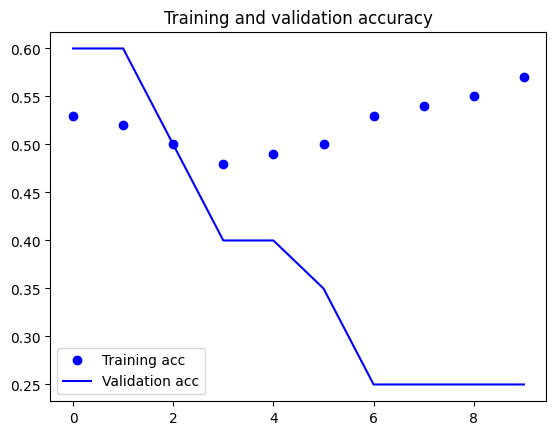

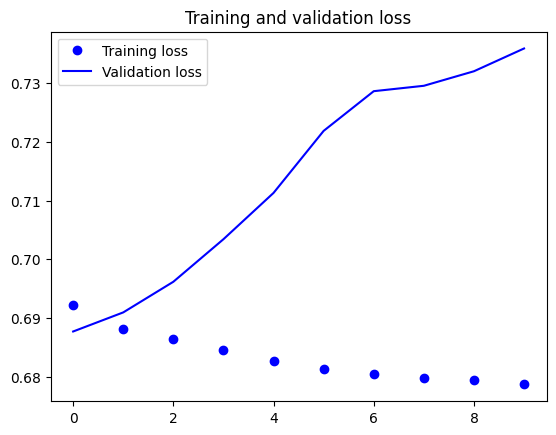

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### $결과분석$

1. 훈련 정확도(Training acc): 에포크(epoch)가 증가함에 따라 점진적으로 상승하는 추세를 보인다.

2. 검증 정확도(Validation acc): 계단식으로 증가하는 패턴을 보인다. 이는 모델이 학습 데이터에 대해 얼마나 잘 학습하고 있는지를 보여준다.

3. 훈련 손실(Training loss): 에포크가 증가함에 따라 손실이 감소하는 경향은 있지만 명확한 추세는 보이지 않는데 모델이 훈련 데이터에 대해 일관되지 않은 성능을 보일 수 있음을 나타낸다.

4. 검증 손실(Validation loss): 에포크가 증가함에 따라 손실이 증가하는 경향을 보이는데 모델이 새로운 데이터에 대해 잘 일반화하지 못하고 있으며 과적합이 발생할 수 있음을 나타낸다.



### 학습 과정 평가 이후 계획

모델의 학습 과정에서 훈련 손실이 감소하기는 하지만 일정하고 분명한 감소 추세를 보이지 않고 있다. 또한, 검증 손실의 에포크가 증가함에 따라 손실이 증가하는 경향을 보인다. 이는 모델이 새로운 데이터에 잘 일반화하지 못하고 과적합이 발생할 수 있을을 시시한다. 하기에서 추가적인 방법들을 사용해 모델의 개선이 이루어지는 실험해 보도록 하겠다.

# 평가항목 1. VGG16 모델을 구현할 수 있는가?	이미지로 제시된 VGG16 모델을 코드로 구현하였다.

### 1. VGG 16 모델 사용_Model A
VGG16 모델을 불러와서 기존의 Conv2D와 MaxPooling2D 층을 대체하고 Flatten 층 다음에 Dense 층의 뉴런 수를 256으로 늘림으로써 VGG16 모델의 강력한 특성 추출 능력을 활용하여 이미지 분류 작업을 수행할 수 있을 것으로 기대

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

# 데이터셋 경로
train_dir = '/root/.keras/datasets/cats_and_dogs_filtered/train'
validation_dir = '/root/.keras/datasets/cats_and_dogs_filtered/validation'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# VGG16 모델 불러오기
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# 모델 구성
model = Sequential([
    vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 학습
model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=10,
          validation_data=val_generator,
          validation_steps=len(val_generator))


### 2. 상기 모델의 학습과정을 개선하고 과적합을 방지하기 위한 개선방안들_Model B

1. 데이터 증강(data augmentation): ImageDataGenerator에 다양한 변환을 적용하여 훈련 데이터를 증강

2. 학습률 조정: Adam 옵티마이저의 학습률을 0.0001로 설정

3. 에포크 수 증가: 모델을 20 에포크 동안 학습시키도록 변경

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# 데이터셋 경로
train_dir = '/root/.keras/datasets/cats_and_dogs_filtered/train'
validation_dir = '/root/.keras/datasets/cats_and_dogs_filtered/validation'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# VGG16 모델 불러오기
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# 모델 구성
model = Sequential([
    vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),  # 학습률 조정
              metrics=['accuracy'])

# 모델 학습
model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=20,  # 에포크 수 증가
          validation_data=val_generator,
          validation_steps=len(val_generator))


# 평가항목 2. 다양한 방법을 사용하여 성능을 향상시켰는가?	다양한 방법을 사용하여 accuracy 53% 이상을 달성하였다.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 1.5724 - accuracy: 0.6685

### 3. VGG16 모델 대신 ResNet과 같은 스킵 연결을 사용하는 모델을 사용_Model C

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# 데이터셋 경로
train_dir = '/root/.keras/datasets/cats_and_dogs_filtered/train'
validation_dir = '/root/.keras/datasets/cats_and_dogs_filtered/validation'

# 이미지 크기 및 배치 크기 설정
img_width, img_height = 150, 150
batch_size = 32

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# ResNet50 모델 불러오기
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# 모델 구성
model = Sequential([
    resnet50,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),  # 학습률 조정
              metrics=['accuracy'])

# 모델 학습
model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=20,  # 에포크 수 증가
          validation_data=val_generator,
          validation_steps=len(val_generator))


### $결과분석$

1. 모델 A: 기본적인 VGG16 모델을 사용하며 데이터 증강이나 학습률 조정 등의 최적화 기법을 사용하지 않았기에 모델 B에 비해 학습률이 낮게 도출되어 학습이 잘 이루어지 않았고 상대적으로 제한적인 성능에 만족해야 했다.  

2. 모델 B: 모델 A에 데이터 증강과 학습률 조정을 추가한 후 모델 A보다 학습이 더 빠르고 안정적으로 이루어졌다. 결과적으로, 모델 B의 성능은 모델 A보다 향상되었다.

3. 모델 C: 이 모델은 VGG16 대신 처음부터 ResNet50을 사용하였는데 그것은 Skip Connection을 사용하는 모델이기에 분명히 Dense Layer에서 발생할 수 있는 Gradient 소실 문제를 완화해줄 것으로 기대했다.

결과적으로, 모델 C는 모델 B보다 정확도 및 손실에서 모두 상당한 개선이 이루어졌으며 모델 A와 모델 B보다 더 향상된 모델로 진화되었다.



# 프로젝트 2: Object Detection

필요한 라이브러리 불러오기

In [ ]:
!pip3 install tensorflow-estimator==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.9/462.9 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires tensorflow-estimator<2.16,>=2.15.0, but you have tensorflow-estimator 2.6.0 which is incompatible.


In [ ]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

이미지를 시각화하는 함수 만들어두기

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

원하는 이미지를 다운로드하고 정해진 가로, 세로 길이에 맞게 이미지를 resizing하는 함수를 만들어두기

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False):

  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

Bounding Box를 만드는 함수를 만들기

In [ ]:
def draw_bounding_box_on_image(image,
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height

  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

이미지 위에 class 이름과 score를 나타내는 함수도 만들기

In [ ]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

원하는 이미지를 불러오고 가로와 세로를 변경해 보는 실험을 진행해 보기

<ipython-input-5-122c7be17db6>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정


Image downloaded to /tmp/tmp_4l2eye6.jpg.


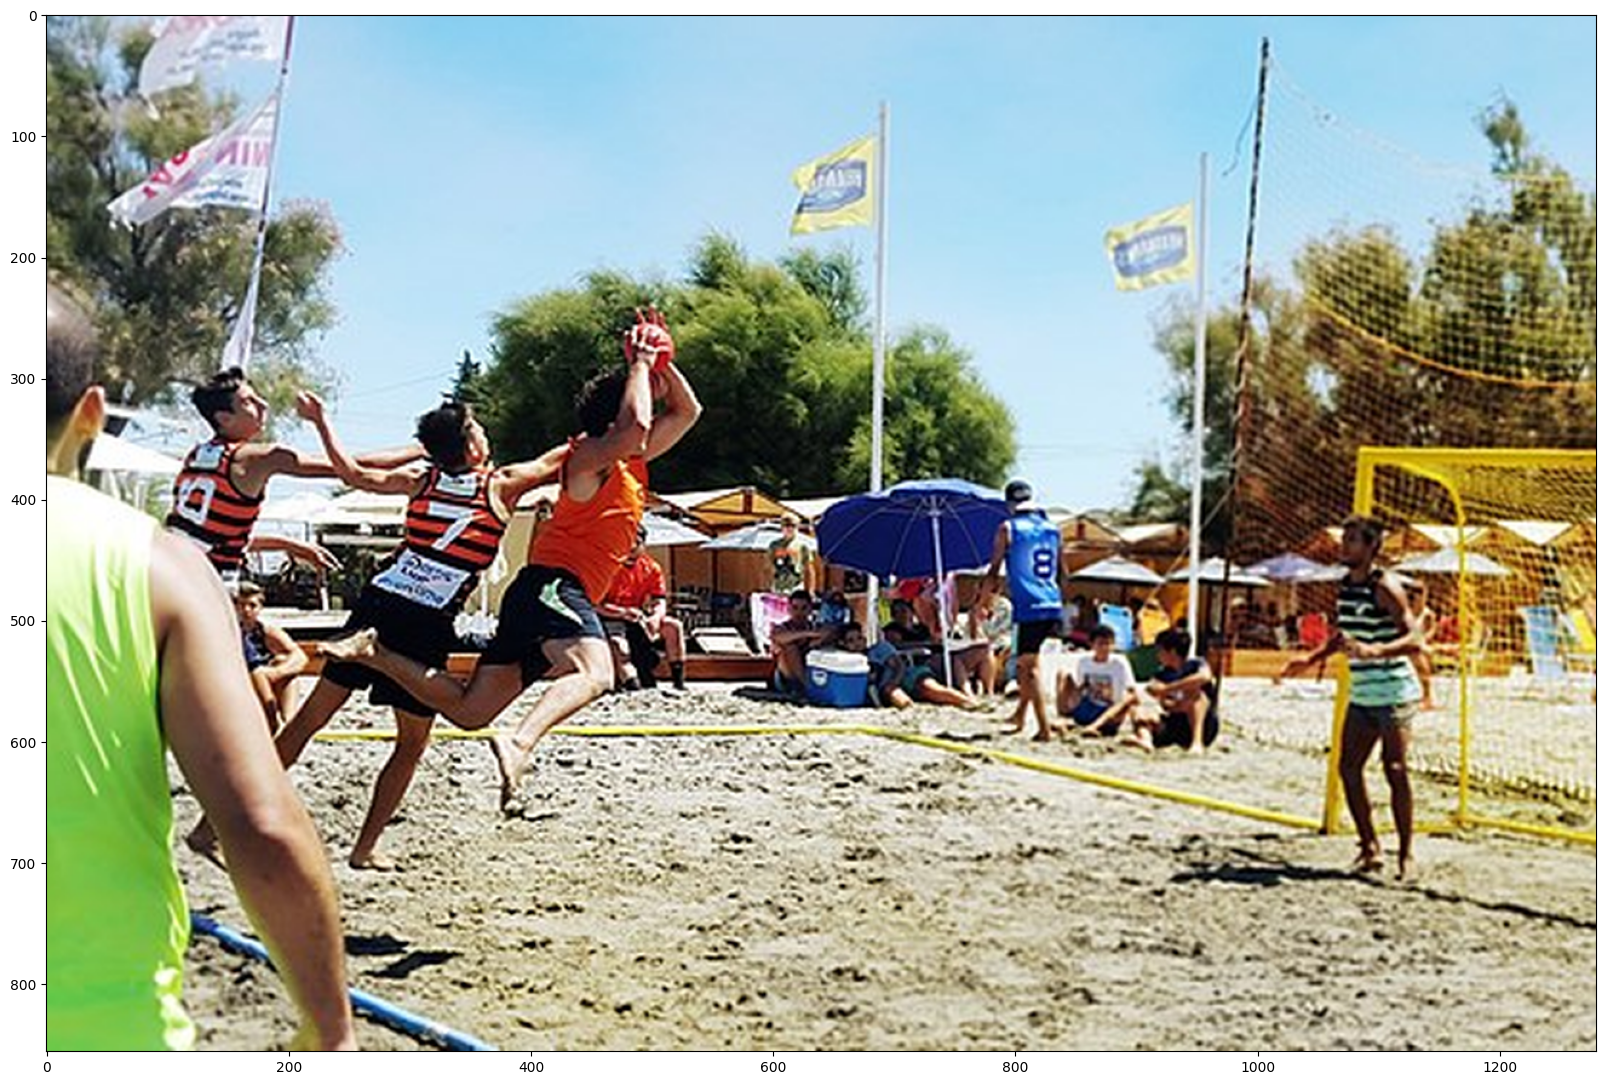

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

tfhub에서 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러오기

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

Detector를 실행하는 함수를 만들기

In [ ]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Detector를 실행하기

Found 100 objects.
Inference time:  49.18682885169983


<ipython-input-6-71c58834bf8f>:19: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
<ipython-input-6-71c58834bf8f>:29: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(display_str)


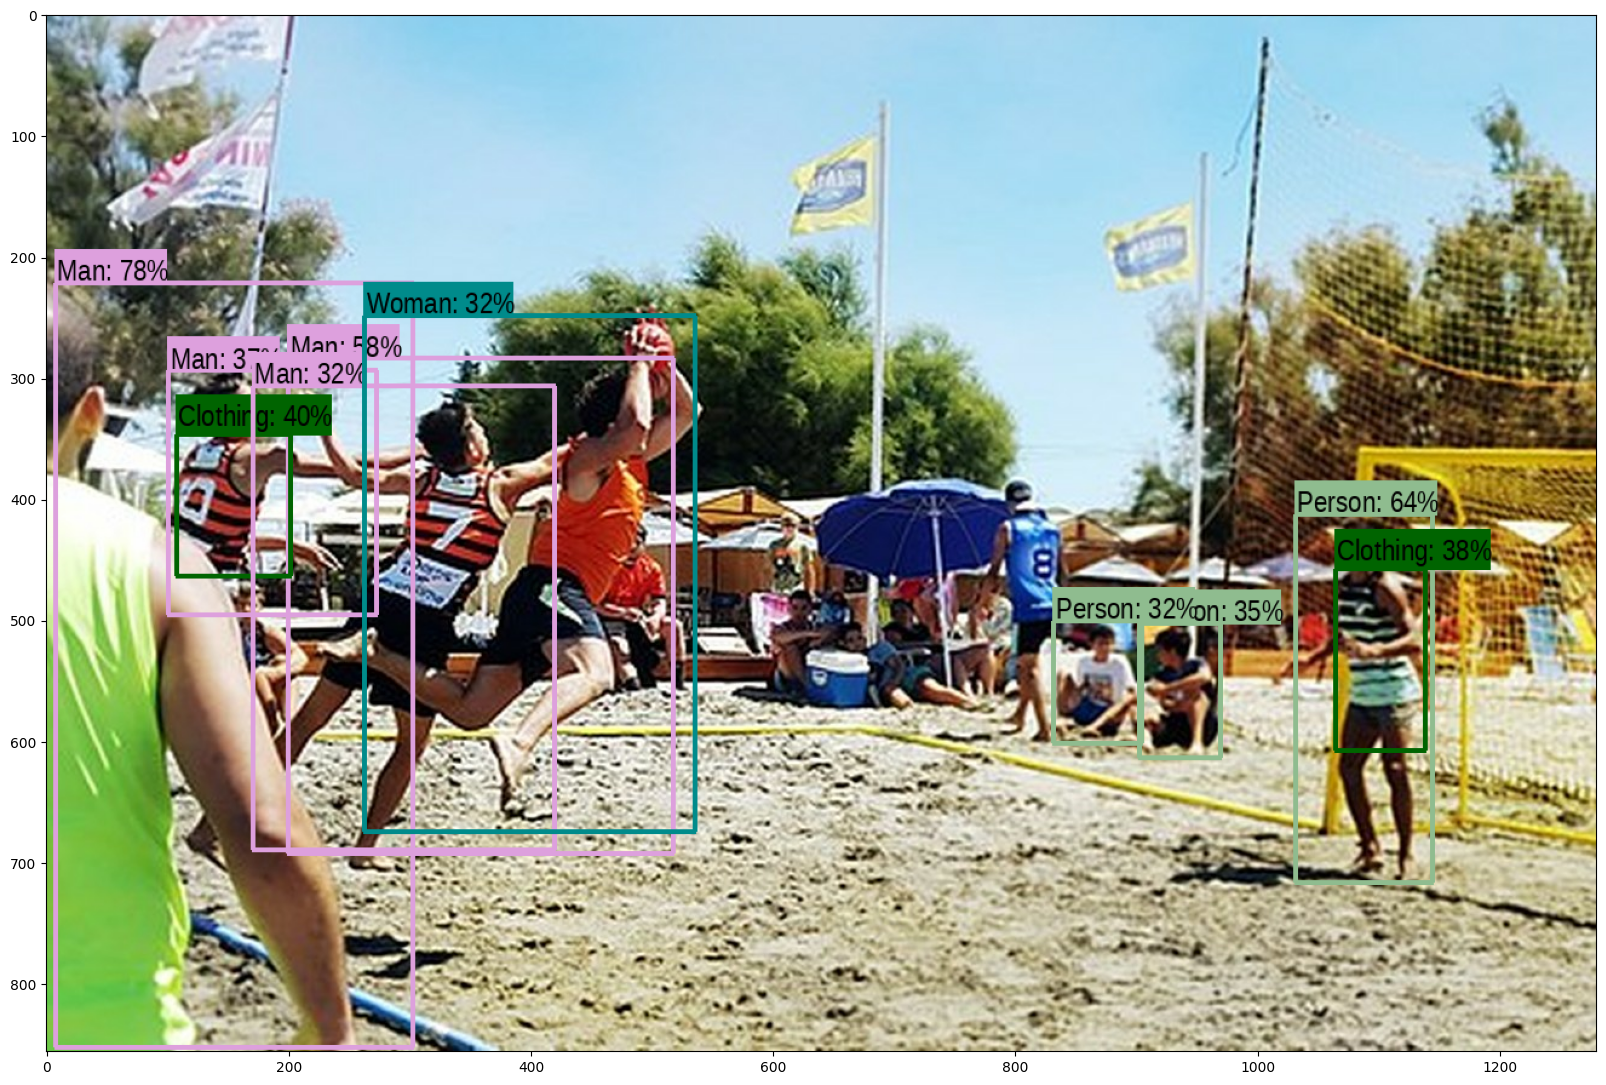

In [ ]:
run_detector(detector, downloaded_image_path)

# 평가항목 3. 다양한 이미지와 모델을 사용하여 Object Detection을 수행하였는가?	제시된 이미지 외의 다른 이미지에 Object Detection을 수행하였고, 1가지 이상의 사전 학습된 모델을 사용하여 결과를 비교하였다.

## 문제 2-1. 다른 이미지 테스트해보기

원하는 이미지를 불러와 결과를 확인해보기

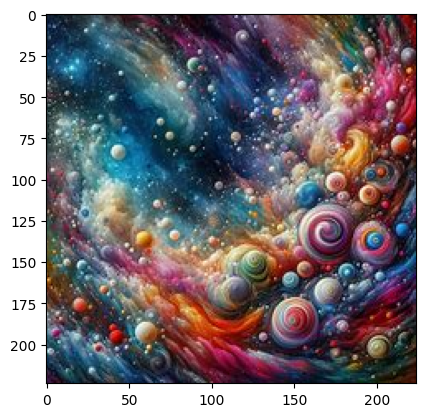

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 이미지 URL
image_url = "https://th.bing.com/th/id/OIG3.2x2nNG1HLajqVn2xYFgh?w=173&h=173&c=6&r=0&o=5&dpr=1.3&pid=ImgGn"

# 이미지 불러오기
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# 이미지 표시하기
plt.imshow(img)
plt.show()


테스트하기

In [ ]:
# 테스트
# 이미지의 기본 정보 출력하기
print("이미지 크기:", img.size)
print("이미지 형식:", img.format)
print("이미지 모드:", img.mode)


이미지 크기: (224, 224)
이미지 형식: JPEG
이미지 모드: RGB


## 문제 2-2. 다양한 pre-trained model 테스트하기

In [ ]:
!pip install tensorflow tensorflow_hub pillow requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0


### 1. TensorFlow Hub에서 'SSD MobileNet V2'와 'CenterNet HourGlass104 512x512'라는 두 개의 객체탐지 모델 사용하기

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# TensorFlow Hub에서 불러올 모델의 URL
model1_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"  # SSD MobileNet V2
model2_url = "https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1"  # CenterNet HourGlass104 512x512

# 모델 불러오기
model1 = hub.load(model1_url)
model2 = hub.load(model2_url)

print("모델이 성공적으로 불러와졌습니다.")


모델이 성공적으로 불러와졌습니다.


##### 모델이 성공적으로 불러와졌습니다.

### 2. 각각의 모델들로 객체탐지하기

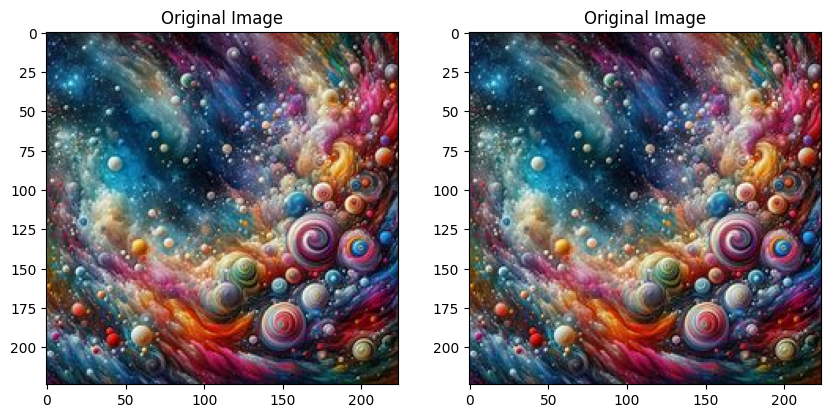

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 테스트할 이미지 URL
image_url = "https://th.bing.com/th/id/OIG3.2x2nNG1HLajqVn2xYFgh?w=173&h=173&c=6&r=0&o=5&dpr=1.3&pid=ImgGn"

# 이미지 불러오기
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# 이미지를 텐서로 변환하기
img_tensor = tf.image.convert_image_dtype(img, dtype=tf.uint8)
img_tensor = tf.expand_dims(img_tensor, axis=0)

# 첫 번째 모델로 객체 탐지하기
result1 = model1(img_tensor)

# 두 번째 모델로 객체 탐지하기
result2 = model2(img_tensor)

# 결과 출력하기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)  # 원본 이미지 출력
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img)  # 원본 이미지 출력
plt.title('Original Image')

plt.show()


### 3. 결과 비교하기

1. 객체탐지 모델의 정확성의 비교는 Ground Truth(실제 값)와 모델의 예측 결과의 비교가 필요 하지만 이를 위해서는 Intersection over Union(IoU)와 같은 메트릭을 사용해야 하며 이러한 비교를 수행하려면 레이블이 지정된 테스트 데이터셋이 필요하며 이 데이터셋은 현재로서는 얻을 수 없다는 AI의 조언을 수용

2. 따라서, 두 모델의 실행 시간과 시각화만을 비교하는 것으로 절충하기로 결정

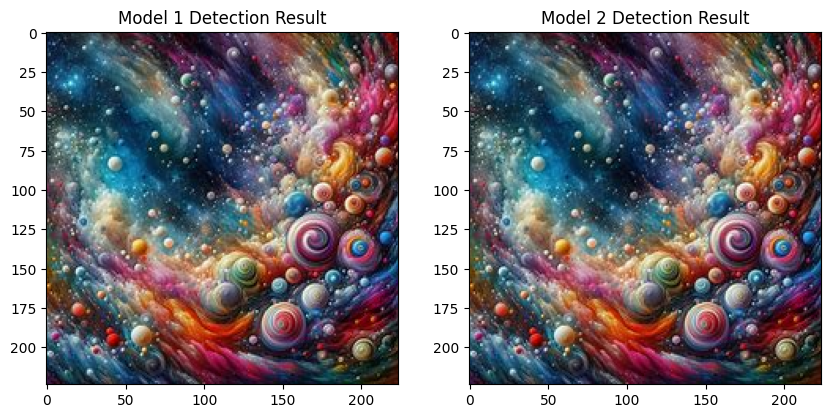

1번째 모델인 SSD MobileNet V2를 사용한 객체 탐지는 0.06183004379272461초 걸렸습니다.
2번째 모델인 CenterNet HourGlass104 512x512를 사용한 객체 탐지는 6.996230363845825초 걸렸습니다.


In [ ]:
import time

# 첫 번째 모델로 객체 탐지하기
start_time = time.time()
result1 = model1(img_tensor)
end_time = time.time()
time1 = end_time - start_time

# 두 번째 모델로 객체 탐지하기
start_time = time.time()
result2 = model2(img_tensor)
end_time = time.time()
time2 = end_time - start_time

# 결과 출력하기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)  # 원본 이미지 출력
plt.title('Model 1 Detection Result')

plt.subplot(1, 2, 2)
plt.imshow(img)  # 원본 이미지 출력
plt.title('Model 2 Detection Result')

plt.show()

# 결과 비교하기
print(f"1번째 모델인 SSD MobileNet V2를 사용한 객체 탐지는 {time1}초 걸렸습니다.")
print(f"2번째 모델인 CenterNet HourGlass104 512x512를 사용한 객체 탐지는 {time2}초 걸렸습니다.")


### $결과분석$

 1. SSD MobileNet V2 모델은 CenterNet HourGlass104 512x512 모델에 비해 훨씬 빠른 속도로 객체 탐지를 수행

 2. 위의 부연 설명처럼 두 모델의 정확성에 대한 평가는 애초의 데이터만으로는 비교 불가

 3. 이미지 분석 결과는 모델의 성능을 직접적으로 나타내지 않으므로 정확한 성능 평가를 위해서는 더 많은 데이터와 테스트가 추후에 반드시 필요

A. SSD MobileNet V2

속도: 매우 빠름 (약 0.062초)

시각화 결과: 모델 1은 색상이 풍부한 우주 장면을 포함한 이미지에서 객체를 탐지



B. CenterNet HourGlass104 512x512

속도: 상대적으로 느림 (약 7.0초)

시각화 결과: SSD MobileNet V2와 큰 차이는 없음





### 4. 새 이미지를 가지고 사이즈 변경 및 Bounding Box를 만들고 Detector 실행하기

In [ ]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [ ]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [ ]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False):

  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [ ]:
def draw_bounding_box_on_image(image,
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):

  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]

  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height

  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [ ]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

1. 이미지의 가로와 세로의 크기를 확대하기

In [ ]:
from PIL import Image
import requests
from io import BytesIO

# 이미지 URL
image_url = "https://th.bing.com/th/id/OIG3.2x2nNG1HLajqVn2xYFgh?w=173&h=173&c=6&r=0&o=5&dpr=1.3&pid=ImgGn"

# 이미지 불러오기
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# 이미지 크기 변경하기
new_width = 1280
new_height = 856
img_resized = img.resize((new_width, new_height))

# 이미지 저장하기
downloaded_image_path = "resized_image.jpg"
img_resized.save(downloaded_image_path)

print(f"이미지가 성공적으로 저장되었습니다: {downloaded_image_path}")


이미지가 성공적으로 저장되었습니다: resized_image.jpg


2. 사전 학습된(Pre-trained) InceptionResnet 모델을 사용한 Faster RCNN 모델을 불러오기

In [ ]:
import tensorflow_hub as hub

module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(module_handle).signatures['default']  # detector에 사용할 모듈 저장


In [ ]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

3. Detector 실행함수 만들기

In [ ]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

4. PyTorch를 사용한 Faster R-CNN 객체 탐지 모델에 의해 탐지된 각 객체에 대한 bounding box, 라벨 및 점수 확인하기

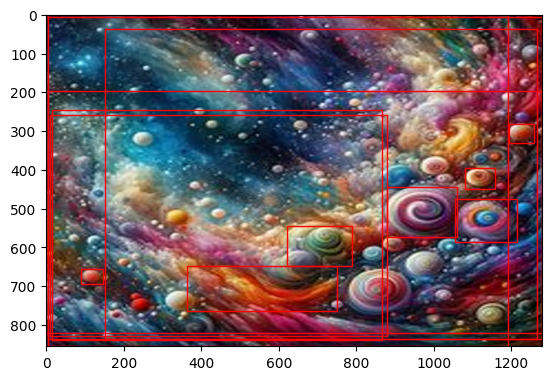

Object 1:
Bounding box: [4.090588092803955, 0.0, 1191.3914794921875, 855.3045043945312]
Label: 61
Score: 0.615979015827179

Object 2:
Bounding box: [1079.9913330078125, 395.1796569824219, 1157.8045654296875, 448.7877197265625]
Label: 60
Score: 0.5152485370635986

Object 3:
Bounding box: [1054.773681640625, 476.16571044921875, 1213.6983642578125, 586.4854736328125]
Label: 60
Score: 0.43649420142173767

Object 4:
Bounding box: [151.2852020263672, 37.94157409667969, 1267.5816650390625, 837.0144653320312]
Label: 59
Score: 0.40358301997184753

Object 5:
Bounding box: [90.86075592041016, 657.2212524414062, 146.47828674316406, 694.71044921875]
Label: 53
Score: 0.1368027627468109

Object 6:
Bounding box: [9.265912055969238, 259.3164978027344, 878.1607666015625, 829.4711303710938]
Label: 59
Score: 0.10623627156019211

Object 7:
Bounding box: [4.65216064453125, 195.56112670898438, 1279.9998779296875, 835.5668334960938]
Label: 67
Score: 0.09423810988664627

Object 8:
Bounding box: [1193.628662109

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 모델 불러오기
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# 이미지 불러오기
image_path = "resized_image.jpg"
image = Image.open(image_path)

# 이미지를 텐서로 변환하기
tensor = F.to_tensor(image).unsqueeze(0)

# 객체 탐지 실행하기
with torch.no_grad():
    prediction = model(tensor)

# 이미지 출력하기
fig, ax = plt.subplots(1)
ax.imshow(image)

# 탐지된 객체들의 bounding box 그리기
for box in prediction[0]['boxes']:
    xmin, ymin, xmax, ymax = box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

# 탐지 결과 분석하기
for i, bbox in enumerate(prediction[0]['boxes']):
    print(f"Object {i+1}:")
    print(f"Bounding box: {bbox.tolist()}")
    print(f"Label: {prediction[0]['labels'][i].item()}")
    print(f"Score: {prediction[0]['scores'][i].item()}\n")
